# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Daniel Estrada Ocaña

- ID: A01369854

- My carreer: ITC


# Importing libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [6]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/Sistemas/4to_semestre/semanaTec/TC1002S/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART 1
# Use your assigned dataset

## A1 Load data

In [7]:
# Dataset url
url = Ruta + "Evidencia/A01369854_X.csv"

# Load the dataset
df = pd.read_csv(url)

## A2 Data managment


Print the first 7 rows

In [10]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4
0,0,-2.637008,6.469373,-8.065872,10.382298
1,1,-7.198506,-2.450691,-10.125392,-8.711022
2,2,-4.965669,-1.941930,-13.139206,-5.410215
3,3,8.318951,9.783888,9.011195,-3.365455
4,4,5.610515,9.479026,9.551860,-7.023893
5,5,9.083749,11.584535,10.599982,-2.966507
6,6,6.649827,10.571454,9.169478,-3.110495


Print the last 4 rows

In [12]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4
388,388,0.742929,8.652554,-3.018461,6.537593
389,389,2.357353,6.295590,-5.362303,8.979738
390,390,2.650814,10.639732,-2.007908,11.072933
391,391,-7.072400,-0.704284,-10.758445,-6.019089


How many rows and columns are in your data?

Use the `shape` method


In [13]:
df.shape

(392, 5)

Print the name of all columns

Use the `columns` method

In [14]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [16]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

# 1) Rows refers to the number of observations in our dataset

# 2) Columns refers to our variables or features in our dataset

# 3)

#...

Print a statistical summary of your columns


In [17]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,195.500000,3.173315,5.889524,1.342545,-2.138052
std,113.304898,6.302593,4.864176,8.243437,7.199664
min,0.000000,-9.861084,-8.021386,-13.703612,-11.843976
25%,97.750000,-2.333433,3.361996,-6.725301,-7.434815
50%,195.500000,4.962112,7.413908,2.431116,-5.101422
75%,293.250000,8.113206,9.376306,9.184893,2.440813
max,391.000000,15.449343,13.684451,15.239239,13.346037


In [ ]:
# 1) What is the minumum and maximum values of each variable

# x1: min=  -9.871084, max= 15.449343
# x2: min=  -8.021386, max= 13.684451
# x3: min= -13.703612, max= 15.239239
# x4: min= -11.843976, max= 13.346037

# 2) What is the mean and standar deviation of each variable

# x1: mean=  3.173315, standar deviation= 6.302593
# x2: mean=  5.889524, standar deviation= 4.864176
# x3: mean=  1.342545, standar deviation= 8.243437
# x4: mean=  -2.138052, standar deviatio= 7.199664


# 3) What the 25%, 50% and 75% represent?

# x1: 25%= -2.333433, 50%=  4.962112, 75%= 8.113206
# x2: 25%=  3.361996, 50%=  7.413908, 75%= 9.376306
# x3: 25%= -6.725301, 50%=  2.431116, 75%= 9.184893
# x4: 25%= -7.434815, 50%= -5.101422, 75%= 2.440813


Rename the columns using the same name with capital letters

In [19]:
newNames = {'x1':'X1', 'x2':'X2', 'x3':'X3', 'x4':'X4'}
df = df.rename(columns=newNames)
df

,Unnamed: 0,X1,X2,X3,X4
0,0,-2.637008,6.469373,-8.065872,10.382298
1,1,-7.198506,-2.450691,-10.125392,-8.711022
2,2,-4.965669,-1.941930,-13.139206,-5.410215
3,3,8.318951,9.783888,9.011195,-3.365455
4,4,5.610515,9.479026,9.551860,-7.023893
...,...,...,...,...,...
387,387,8.867089,8.961678,9.061760,-2.688653
388,388,0.742929,8.652554,-3.018461,6.537593
389,389,2.357353,6.295590,-5.362303,8.979738
390,390,2.650814,10.639732,-2.007908,11.072933


Rename the columns to their original names

In [21]:
oriNames = {'X1':'x1', 'X2':'x2', 'X3':'x3', 'X4':'x4'}
df = df.rename(columns=oriNames)
df

,Unnamed: 0,x1,x2,x3,x4
0,0,-2.637008,6.469373,-8.065872,10.382298
1,1,-7.198506,-2.450691,-10.125392,-8.711022
2,2,-4.965669,-1.941930,-13.139206,-5.410215
3,3,8.318951,9.783888,9.011195,-3.365455
4,4,5.610515,9.479026,9.551860,-7.023893
...,...,...,...,...,...
387,387,8.867089,8.961678,9.061760,-2.688653
388,388,0.742929,8.652554,-3.018461,6.537593
389,389,2.357353,6.295590,-5.362303,8.979738
390,390,2.650814,10.639732,-2.007908,11.072933


Use two different alternatives to get one of the columns

In [26]:
a = df.x1
b = df.loc[:,'x1']

print(a,b)


0     -2.637008
1     -7.198506
2     -4.965669
3      8.318951
4      5.610515
         ...   
387    8.867089
388    0.742929
389    2.357353
390    2.650814
391   -7.072400
Name: x1, Length: 392, dtype: float64 0     -2.637008
1     -7.198506
2     -4.965669
3      8.318951
4      5.610515
         ...   
387    8.867089
388    0.742929
389    2.357353
390    2.650814
391   -7.072400
Name: x1, Length: 392, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [32]:
df.iloc[62:72, 2:4]

,x2,x3
62,-8.021386,-8.064350
63,6.346805,8.935645
64,7.172351,11.568654
65,0.237704,-6.323923
66,8.952647,-1.928209
67,6.119641,-0.663169
68,9.973920,-1.747450
69,12.474618,9.468129
70,-3.208477,-10.540776
71,6.457696,-5.976781


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [44]:
columnas = ['x2','x3']

print('Null values: \n', df[columnas].isnull().sum())
print('Not Null values: \n', df[columnas].notnull().sum())
print('Total number of rows:', df.shape[0])


print(df.shape[0]==df[columnas].notnull().sum())

Null values: 
 x2    0
x3    0
dtype: int64
Not Null values: 
 x2    392
x3    392
dtype: int64
Total number of rows: 392
x2    True
x3    True
dtype: bool


Discard the last column


In [46]:
df.drop('x4', axis=1, inplace=True)

df

,Unnamed: 0,x1,x2,x3
0,0,-2.637008,6.469373,-8.065872
1,1,-7.198506,-2.450691,-10.125392
2,2,-4.965669,-1.941930,-13.139206
3,3,8.318951,9.783888,9.011195
4,4,5.610515,9.479026,9.551860
...,...,...,...,...
387,387,8.867089,8.961678,9.061760
388,388,0.742929,8.652554,-3.018461
389,389,2.357353,6.295590,-5.362303
390,390,2.650814,10.639732,-2.007908


### Questions

Based on the previos results, provide a description of yout dataset

Your response:

My dataset has 392 observations (rows) and 4 variables (columns), it consist of numerical values across four columns labeled x1, x2, x3, and x4. Without any more information, it seems like a tabular dataset with numerical values across different variables.



## A3 Data visualization

Plot in the same figure the histogram of two variables



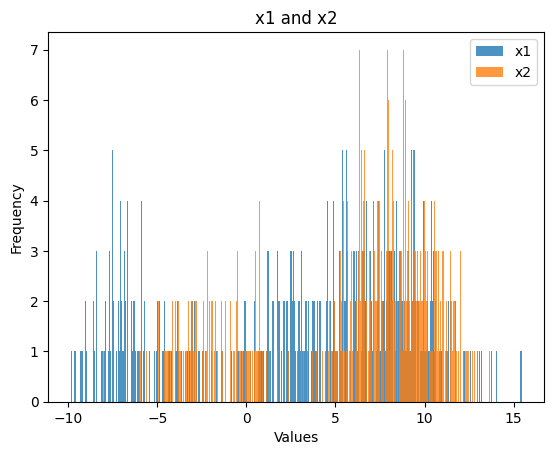

In [47]:
plt.hist(df['x1'], bins=len(df), alpha=0.8, label='x1')
plt.hist(df['x2'], bins=len(df), alpha=0.8, label='x2')
plt.title('x1 and x2')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

We can see that the histogram of x1 and x2 appears to have a roughly symmetric distribution, centered around the mean, with values ranging from negative to positive mostly in range between 5-10. While analyzed separately, there may be some overlap between the distributions of x1 and x2, indicating potential correlation or relationship between these variables

Plot in the same figure the boxplot of two variables

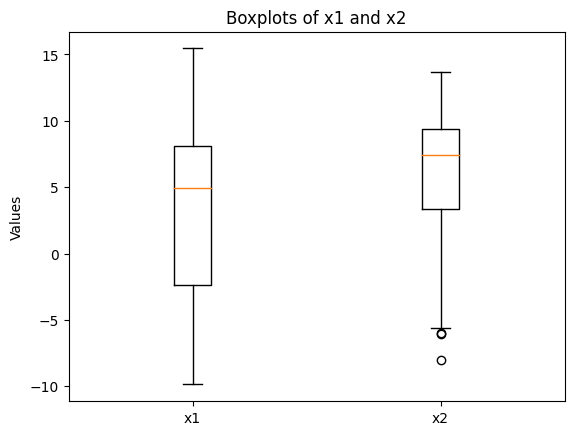

In [49]:
plt.boxplot([df['x1'], df['x2']])
plt.title('Boxplots of x1 and x2')
plt.ylabel('Values')
plt.xticks([1, 2], ['x1', 'x2'])
plt.show()

Plot the scatter plot of two variables

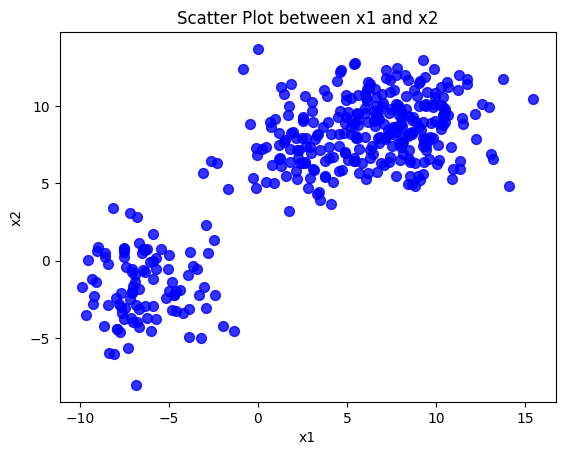

In [52]:
plt.scatter(df.x1, df.x2, color='b', s=50, marker='o', alpha=0.8)
plt.title('Scatter Plot between x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:

Based on the histograms and scatter plot between x1 and x2, both variables exhibit symmetric distributions with values spanning from negative to positive. The scatter plot suggests a positive correlation between x1 and x2, as data points tend to form a linear pattern. We can observ that there are 3 groups (cluster) or even more, but two are more visible.




**Loading the dataframe again to recover the fourth column that was eliminated before**

In [56]:
df = pd.read_csv(url)

df

,Unnamed: 0,x1,x2,x3,x4
0,0,-2.637008,6.469373,-8.065872,10.382298
1,1,-7.198506,-2.450691,-10.125392,-8.711022
2,2,-4.965669,-1.941930,-13.139206,-5.410215
3,3,8.318951,9.783888,9.011195,-3.365455
4,4,5.610515,9.479026,9.551860,-7.023893
...,...,...,...,...,...
387,387,8.867089,8.961678,9.061760,-2.688653
388,388,0.742929,8.652554,-3.018461,6.537593
389,389,2.357353,6.295590,-5.362303,8.979738
390,390,2.650814,10.639732,-2.007908,11.072933


## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [63]:
K  = 3

km = KMeans(n_clusters=K, n_init="auto")

yestimated = km.fit_predict(df[['x1','x2','x3','x4']])


yestimated

array([0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 1,

Add to your dataset a column with the estimated cluster to each data point

In [64]:
df['yestimated'] = yestimated

df

,Unnamed: 0,x1,x2,x3,x4,yestimated
0,0,-2.637008,6.469373,-8.065872,10.382298,0
1,1,-7.198506,-2.450691,-10.125392,-8.711022,2
2,2,-4.965669,-1.941930,-13.139206,-5.410215,2
3,3,8.318951,9.783888,9.011195,-3.365455,1
4,4,5.610515,9.479026,9.551860,-7.023893,1
...,...,...,...,...,...,...
387,387,8.867089,8.961678,9.061760,-2.688653,1
388,388,0.742929,8.652554,-3.018461,6.537593,0
389,389,2.357353,6.295590,-5.362303,8.979738,0
390,390,2.650814,10.639732,-2.007908,11.072933,0


Print the number associated to each cluster

In [65]:
df.yestimated.unique()

array([0, 2, 1], dtype=int32)

Print the centroids

In [66]:
km.cluster_centers_

array([[ 2.74604124,  7.39604345, -5.00441767,  9.52674172],
       [ 8.13425613,  8.93631206,  9.29529553, -5.3125144 ],
       [-6.32129211, -1.710573  , -8.21599227, -7.4539196 ]])

Print the intertia metric

In [67]:
km.inertia_

6864.785555633871

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

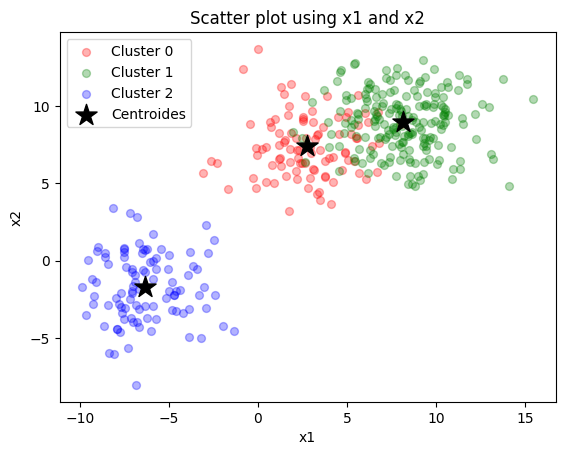

In [69]:
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]


# Scatter plot of each cluster
plt.scatter(df0.x1, df0.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df1.x1, df1.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot using x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

We can see that creating 3 cluster points is pretty acurate, on this scatter plot we only use x1 and x2, but to know for sure if using any other variable will be as precise we can create and albow point. Just to verify that the number of cluster points is correct.

## A5 Elbow plot

Compute the Elbow plot

In [70]:
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x2', 'x3', 'x4']])
    # Save sse for each k
    sse.append(km.inertia_)

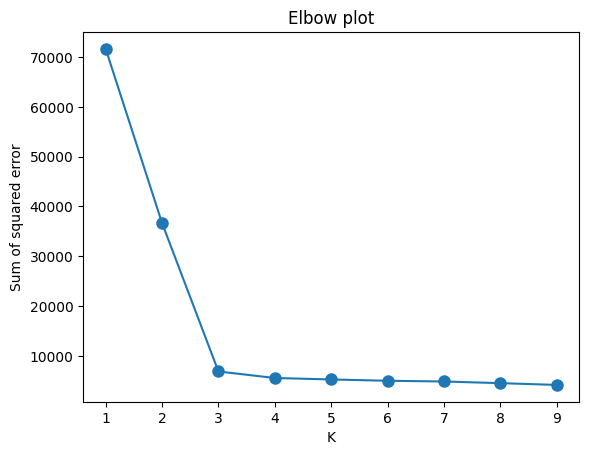

In [71]:
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
 K = 3, we can be sure of this because on the elbow plot, thats where the decrease rate gets lower.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

Yes, the agreement between the number of clusters obtained from the elbow point method and the initial guess suggests that the structure of the data aligns well with the prior assumption regarding the number of distinct groups or clusters present. This agreement validates the initial hypothesis and indicates that the clustering algorithm successfully captured the inherent patterns in the data. It also enhances the interpretability and consistency of the analysis, providing confidence in the understanding of the data's organization.

# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

En base a esta subcompetencia, creo que la interpretación de variables es fácil de desarrollar. Siempre tenemos que comprender el tipo de información con la que estamos trabajando, ya sean números enteros, flotantes, o incluso strings, y de esta forma será más fácil de comprender el uso o el origen de estas variables. Cuando no viene ninguna descripción o interpretación de las variables es necesario analizar toda la información para poder darle una interpretación y sea así más fácil su manejo para desarrollar modelos y utilizar la información de manera sencilla y correcta.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Gracias a la evidencia puedo comprobar que soy capaz de contruir modelos bivariados, manejando de manera correcta las variables, comprendiendo su tipo e incluso interpretando su significado para poder visualizar la información, y así usarla con fines de modelos de entrenamiento de IA.